In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('~/Desktop/ANACONDA/Thesis/dataset/ISICO-DATASET2.csv')
df.head()

,Item Type,Publication Year,Author,Title,Publication Title,ISSN,DOI,Url,Keywords,Abstract Note,Date,Pages,Volume,Journal Abbreviation
0,journalArticle,2015,"Ismail, Azrin Shah; Khalid, Haliyana",‚ÄòFishing‚Äô for Content in Social Media: A Q...,Procedia Computer Science,18770509,10.1016/j.procs.2015.12.156,https://linkinghub.elsevier.com/retrieve/pii/S...,"Social Media, Human Behaviour, Information Qua...",Content is king: a vital principle for all soc...,2015,406-413,72,Procedia Computer Science
1,journalArticle,2015,"Widaningrum, Dyah Lestari",A GIS ‚Äì Based Approach for Catchment Area An...,Procedia Computer Science,18770509,10.1016/j.procs.2015.12.158,https://linkinghub.elsevier.com/retrieve/pii/S...,GIS; Retail; Convenience Store; Catchment Are...,This study is conduct to evaluate socio-econom...,2015,511-518,72,Procedia Computer Science
2,journalArticle,2015,"Saleh, Ain Zubaidah Mohd; Rozali, Nur Amizah; ...",A Method for Web Application Vulnerabilities D...,Procedia Computer Science,18770509,10.1016/j.procs.2015.12.111,https://linkinghub.elsevier.com/retrieve/pii/S...,"Web Application Vulnerabilities, SQL Injectio...",Internet have become a great medium of communi...,2015,112-121,72,Procedia Computer Science
3,journalArticle,2015,"Shahiri, Amirah Mohamed; Husain, Wahidah; Rash...",A Review on Predicting Student's Performance U...,Procedia Computer Science,18770509,10.1016/j.procs.2015.12.157,https://linkinghub.elsevier.com/retrieve/pii/S...,"Student performance, educational data mining, ...",Predicting students performance becomes more c...,2015,414-422,72,Procedia Computer Science
4,journalArticle,2015,"Mohammed, Salmah Mousbah Zeed; Mohd, Azizul Ra...",A Secure Mobile App Solution Using Human Behav...,Procedia Computer Science,18770509,10.1016/j.procs.2015.12.124,https://linkinghub.elsevier.com/retrieve/pii/S...,User authentication; CW-Lite security model; ...,Mobile devices have gained popularity worldwid...,2015,434-445,72,Procedia Computer Science


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
custom_palette = sns.color_palette('mako')
sns.set(style='whitegrid', palette=custom_palette)

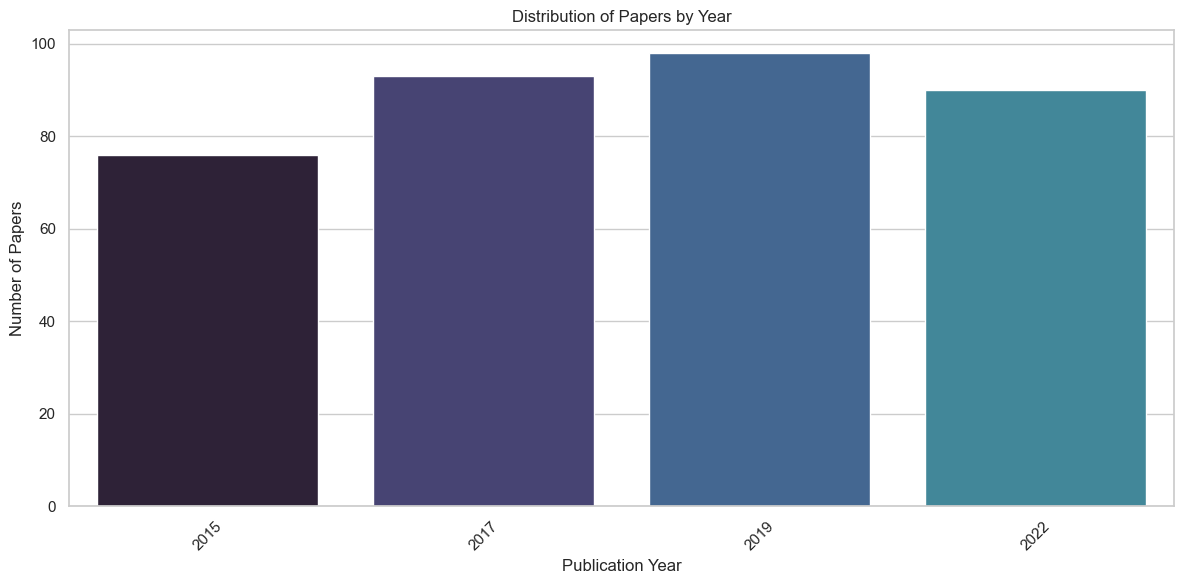

In [16]:
# 1. Publication Trends Over Time
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x= 'Publication Year',)
plt.title('Distribution of Papers by Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Papers')
plt.xlabel('Publication Year')
plt.tight_layout()

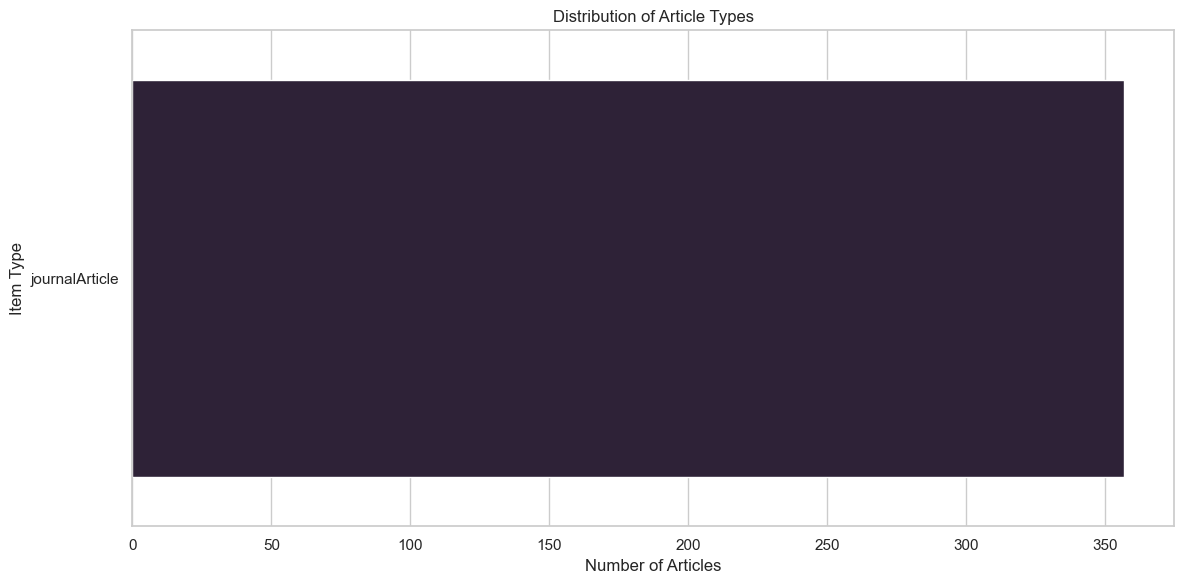

In [19]:
# 2. Distribution of Article Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Item Type')
plt.title('Distribution of Article Types')
plt.xlabel('Number of Articles')
plt.ylabel('Item Type')
plt.tight_layout()

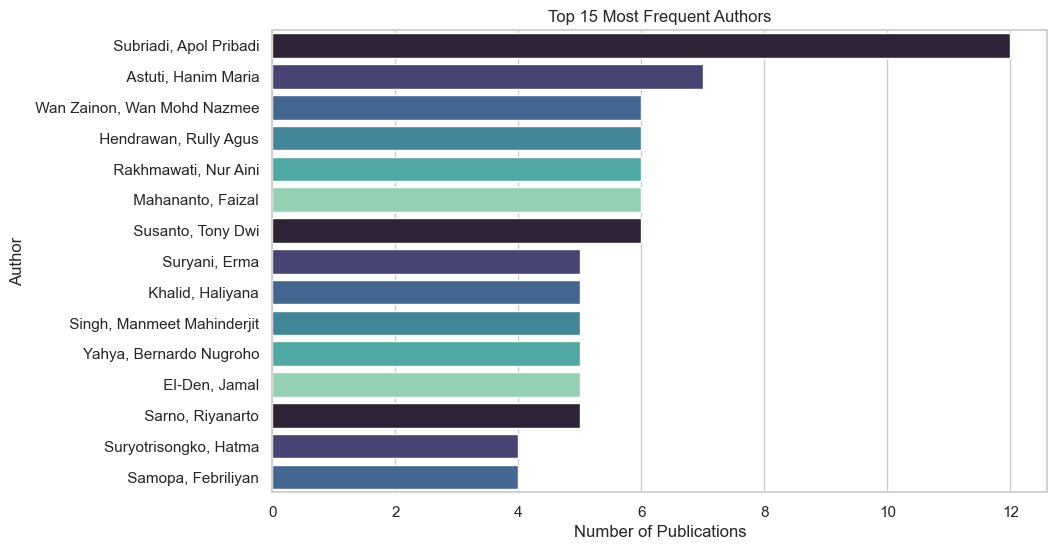

In [20]:
# author lists of frequecies of all papers 2015, 2017, 2019, 2022

author_list = df['Author'].str.split(';').explode()
author_counts = author_list.value_counts().head(15)

# Visualizing the most frequent authors
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette = custom_palette)
plt.title('Top 15 Most Frequent Authors')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.show()

In [21]:
author_counts

Author
 Subriadi, Apol Pribadi         12
 Astuti, Hanim Maria             7
 Wan Zainon, Wan Mohd Nazmee     6
 Hendrawan, Rully Agus           6
 Rakhmawati, Nur Aini            6
 Mahananto, Faizal               6
 Susanto, Tony Dwi               6
 Suryani, Erma                   5
 Khalid, Haliyana                5
 Singh, Manmeet Mahinderjit      5
 Yahya, Bernardo Nugroho         5
 El-Den, Jamal                   5
 Sarno, Riyanarto                5
Suryotrisongko, Hatma            4
 Samopa, Febriliyan              4
Name: count, dtype: int64

In [29]:
# Splitting the keywords in the 'Keywords' column by ';' and ','

# Function to split and clean keywords
def split_and_clean_keywords(keyword_string):
    if not isinstance(keyword_string, str):
        return []

    # Splitting by ';' and ','
    split_keywords = [kw.strip() for separator in [';', ','] for kw in keyword_string.split(separator)]
    
    # Removing empty strings and duplicates
    clean_keywords = list(set([kw for kw in split_keywords if kw]))

    return clean_keywords

# Applying the function to the 'Keywords' column
df['Split Keywords'] = df['Keywords'].apply(split_and_clean_keywords)

# Display the updated dataset with split keywords
df[['Keywords', 'Split Keywords']].head()


,Keywords,Split Keywords
0,"Social Media, Human Behaviour, Information Qua...","[Social Media, Social Media, Human Behaviour, ..."
1,GIS; Retail; Convenience Store; Catchment Are...,"[GIS, GIS; Retail; Convenience Store; Catchmen..."
2,"Web Application Vulnerabilities, SQL Injectio...","[Web Application Vulnerabilities, SQL Injectio..."
3,"Student performance, educational data mining, ...","[Student performance, Student performance, edu..."
4,User authentication; CW-Lite security model; ...,[Analytic Hierarchy Process (AHP) for decision...


In [34]:
from collections import Counter

# Grouping the data by 'Publication Year' and aggregating keywords
grouped_data = df.groupby('Publication Year')['Split Keywords'].sum()

# Finding the top keywords for each year
top_keywords_by_year = {year: Counter(keywords).most_common(5) for year, keywords in grouped_data.items()}

top_keywords_by_year


{2015: [('classification', 4),
  ('knowledge management', 3),
  ('k-means', 2),
  ('genetic algorithm', 2),
  ('Motor Imagery', 2)],
 2017: [('e-Government', 5),
  ('Social Media', 3),
  ('Service Quality', 3),
  ('Smart City', 2),
  ('Software Cost Estimation', 2)],
 2019: [('UTAUT', 4),
  ('Social Media', 3),
  ('CNN', 2),
  ('E-government', 2),
  ('data mining', 2)],
 2022: [('system dynamics', 4),
  ('COVID-19', 3),
  ('Sentiment analysis', 3),
  ('quality of service', 2),
  ('project management', 2)]}

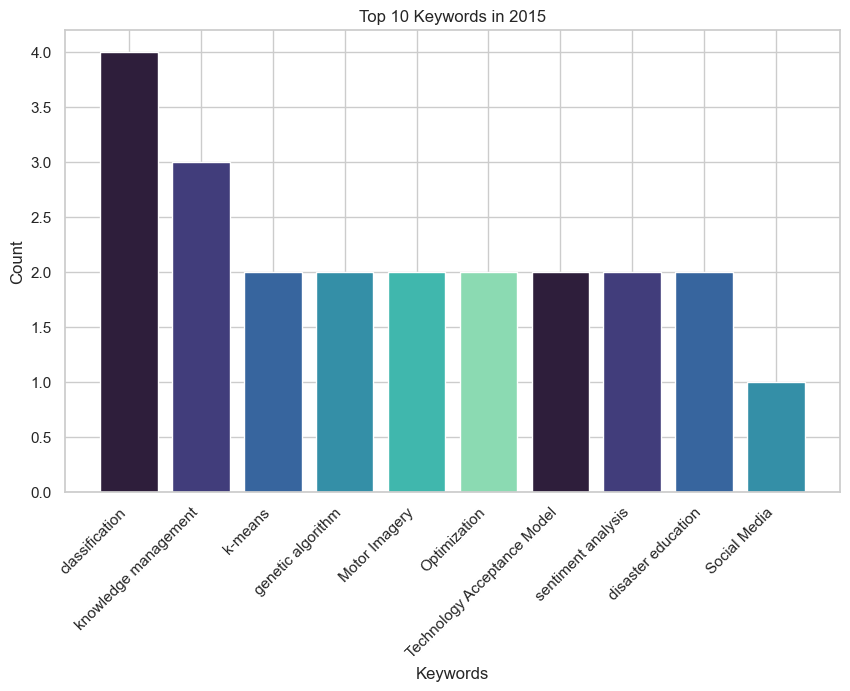

In [36]:
import matplotlib.pyplot as plt

# Getting the top 10 keywords for the year 2015
top_10_keywords_2015 = Counter(grouped_data[2015]).most_common(10)

# Separating the keywords and their counts for plotting
keywords_2015, counts_2015 = zip(*top_10_keywords_2015)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(keywords_2015, counts_2015, color=custom_palette)
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Top 10 Keywords in 2015')
plt.xticks(rotation=45, ha='right')
plt.show()

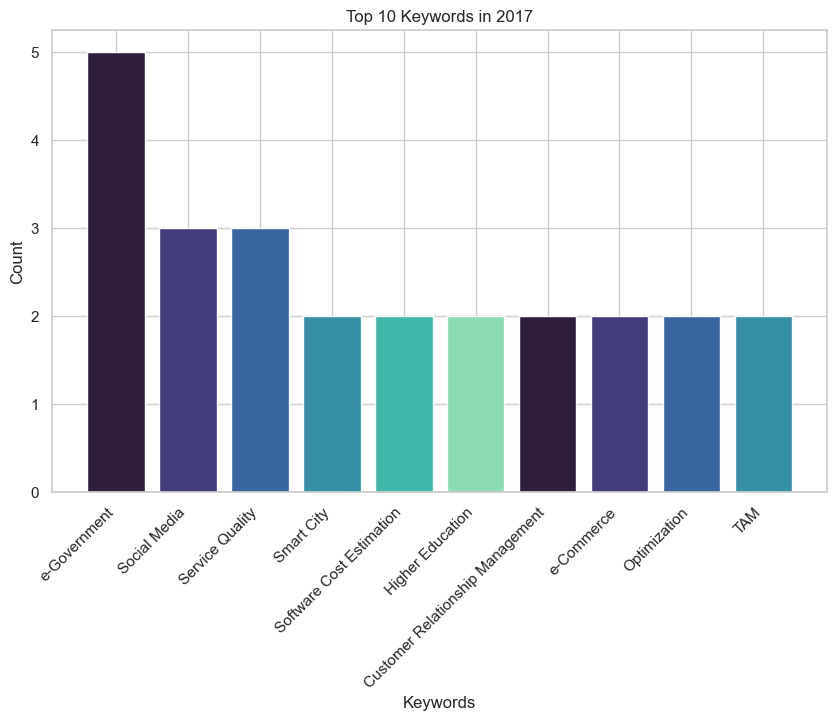

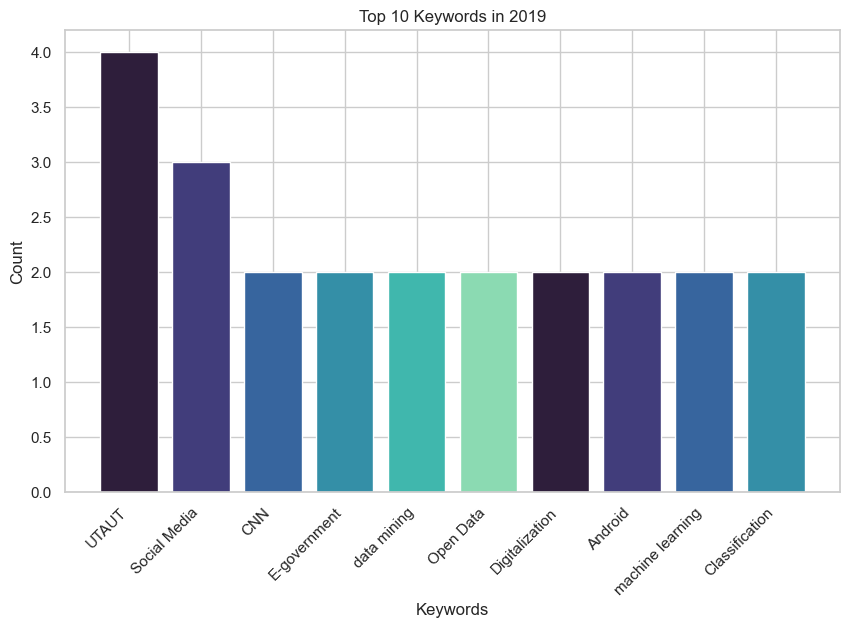

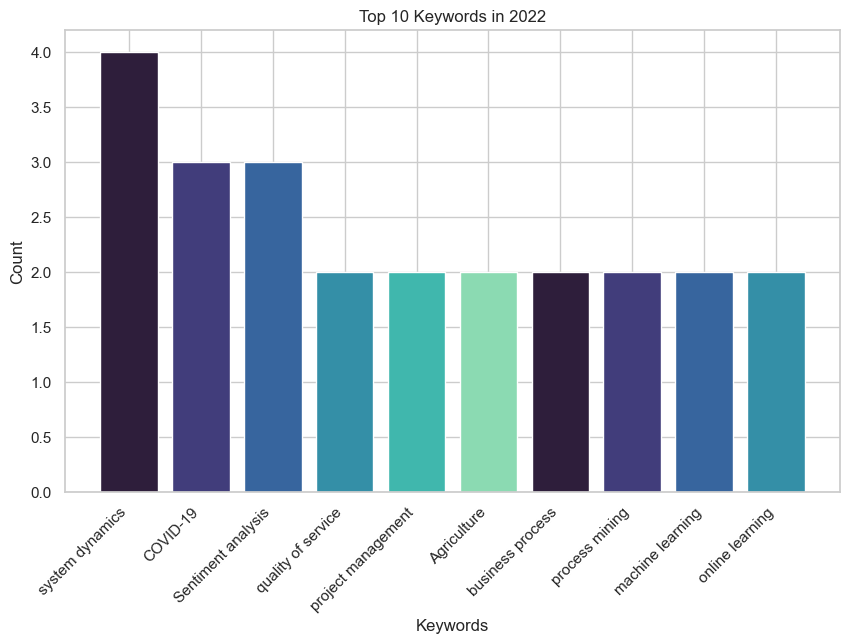

In [45]:
# Function to create bar plot for top 10 keywords of a given year
def plot_top_keywords(year, grouped_data):
    top_10_keywords = Counter(grouped_data[year]).most_common(10)
    keywords, counts = zip(*top_10_keywords)

    plt.figure(figsize=(10, 6))
    plt.bar(keywords, counts, color=custom_palette)
    plt.xlabel('Keywords')
    plt.ylabel('Count')
    plt.title(f'Top 10 Keywords in {year}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plotting for the years 2017, 2019, and 2022
plot_top_keywords(2017, grouped_data)
plot_top_keywords(2019, grouped_data)
plot_top_keywords(2022, grouped_data)

In [56]:
# Latent Dirichlet Allocation

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Extracting keywords for the year 2015
keywords_2015_data = df[df['Publication Year'] == 2015]['Split Keywords']

# Preparing the data for LDA: each list of keywords is joined into a single string
keywords_2015_joined = [" ".join(keywords) for keywords in keywords_2015_data]

# Creating a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(keywords_2015_joined)

# Fitting LDA to the document-term matrix
# Number of topics is set arbitrarily, can be tuned as needed
num_topics = 4
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(dtm)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying the top words in each topic
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 1:
process security computer system based model cross perceived one evacuation
Topic 2:
data information mining clustering optimization credibility system learning use human
Topic 3:
knowledge management culture system enterprise support control process sharing classification
Topic 4:
model data computing process automatic algorithm analysis mining ahp ooad


In [57]:
from sklearn.cluster import KMeans

# Number of clusters for KMeans
num_clusters = 4

# Performing KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(dtm)

# Adding the cluster labels to the original dataset (for the year 2015)
keywords_2015_data = keywords_2015_data.to_frame()
keywords_2015_data['Cluster'] = clusters

# Displaying the first few rows with cluster labels
keywords_2015_data.head()

/Users/markryan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Split Keywords,Cluster
0,"[Social Media, Social Media, Human Behaviour, ...",0
1,"[GIS, GIS; Retail; Convenience Store; Catchmen...",0
2,"[Web Application Vulnerabilities, SQL Injectio...",0
3,"[Student performance, Student performance, edu...",3
4,[Analytic Hierarchy Process (AHP) for decision...,0


In [59]:
output_clustered_keywords_file_path = 'clustered_keywords_2015.xlsx'

# Saving the clustered keywords data to an Excel file
keywords_2015_data.to_excel(output_clustered_keywords_file_path, index=False)

output_clustered_keywords_file_path

'clustered_keywords_2015.xlsx'

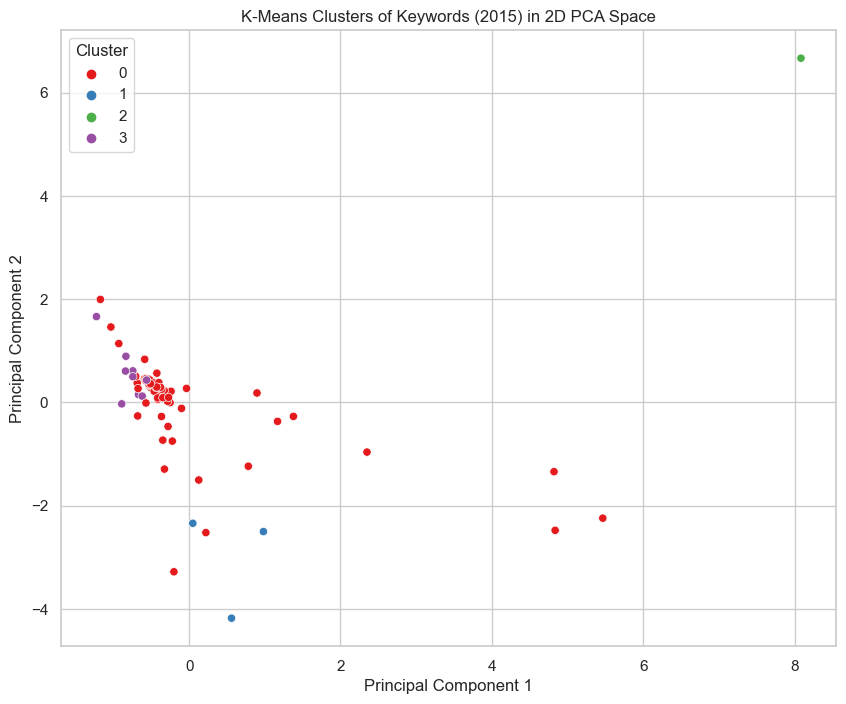

In [60]:
from sklearn.decomposition import PCA
import seaborn as sns

# Performing PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dtm.toarray())

# Adding the principal components to the keywords data
keywords_2015_data['PC1'] = principal_components[:, 0]
keywords_2015_data['PC2'] = principal_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=keywords_2015_data, palette='Set1')
plt.title('K-Means Clusters of Keywords (2015) in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to extract centroids for a given year
def extract_centroids(year_data):
    keywords = [" ".join(kw) for kw in year_data['Split Keywords']]
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(keywords)
    kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
    centroids = kmeans.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    centroid_terms = [terms[centroid.argsort()[-10:]] for centroid in centroids]
    return [" ".join(terms) for terms in centroid_terms]

# Extracting centroids for each year
centroids_2015 = extract_centroids(df[df['Publication Year'] == 2015])
centroids_2017 = extract_centroids(df[df['Publication Year'] == 2017])
centroids_2019 = extract_centroids(df[df['Publication Year'] == 2019])
centroids_2022 = extract_centroids(df[df['Publication Year'] == 2022])


/Users/markryan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate cosine similarity between sets of centroids
def calculate_similarity(centroids1, centroids2):
    vectorizer = TfidfVectorizer()
    X1 = vectorizer.fit_transform(centroids1)
    X2 = vectorizer.transform(centroids2)
    return cosine_similarity(X1, X2)

# Calculate similarities
similarity_2015_2017 = calculate_similarity(centroids_2015, centroids_2017)
similarity_2017_2019 = calculate_similarity(centroids_2017, centroids_2019)
similarity_2019_2022 = calculate_similarity(centroids_2019, centroids_2022)

In [64]:
# Function to prepare data for Sankey diagram
def prepare_sankey_data(similarity_matrix, source_year, target_year):
    source_nodes = [f"Cluster {i} ({source_year})" for i in range(len(similarity_matrix))]
    target_nodes = [f"Cluster {i} ({target_year})" for i in range(len(similarity_matrix[0]))]
    source_target_pairs = [(source, target, similarity_matrix[i][j])
                           for i, source in enumerate(source_nodes)
                           for j, target in enumerate(target_nodes)]
    return source_target_pairs

# Preparing data
sankey_data_2015_2017 = prepare_sankey_data(similarity_2015_2017, 2015, 2017)
sankey_data_2017_2019 = prepare_sankey_data(similarity_2017_2019, 2017, 2019)
sankey_data_2019_2022 = prepare_sankey_data(similarity_2019_2022, 2019, 2022)

In [71]:
import plotly.graph_objects as go

# Combining data for all years
sankey_data = sankey_data_2015_2017 + sankey_data_2017_2019 + sankey_data_2019_2022

# Extracting nodes and links for the diagram
nodes = list(set([item[0] for item in sankey_data] + [item[1] for item in sankey_data]))
node_indices = {node: idx for idx, node in enumerate(nodes)}
links = [{'source': node_indices[source], 'target': node_indices[target], 'value': weight}
         for source, target, weight in sankey_data if weight > 0.1]  # Threshold to filter very weak links

# Creating Sankey diagram
fig = go.Figure(data=[go.Sankey(node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
                                         label=nodes, color="blue"),
                             link=dict(source=[link['source'] for link in links],
                                       target=[link['target'] for link in links],
                                       value=[link['value'] for link in links]))])
fig.update_layout(title_text="Sankey Diagram of Keyword Clusters Over Years", font_size=10)
fig.show()

In [78]:
import pandas as pd

# Function to prepare data for Sankey diagram with clear source and target identification
def prepare_sankey_data(similarity_matrix, source_terms, target_terms, source_year, target_year):
    source_nodes = [f"{source_year}_{i}: {term}" for i, term in enumerate(source_terms)]
    target_nodes = [f"{target_year}_{i}: {term}" for i, term in enumerate(target_terms)]
    source_target_pairs = [(source, target, similarity_matrix[i][j])
                           for i, source in enumerate(source_nodes)
                           for j, target in enumerate(target_nodes)]
    return source_target_pairs

# Assuming the similarity matrices and top terms are already computed
sankey_data_2015_2017 = prepare_sankey_data(similarity_2015_2017, top_terms_2015, top_terms_2017, 2015, 2017)
sankey_data_2017_2019 = prepare_sankey_data(similarity_2017_2019, top_terms_2017, top_terms_2019, 2017, 2019)
sankey_data_2019_2022 = prepare_sankey_data(similarity_2019_2022, top_terms_2019, top_terms_2022, 2019, 2022)

# Combining all the data
all_sankey_data = sankey_data_2015_2017 + sankey_data_2017_2019 + sankey_data_2019_2022

# Creating a DataFrame
sankey_df = pd.DataFrame(all_sankey_data, columns=['Source', 'Target', 'Weight'])

# Exporting to Excel
output_file_path = 'sankey_data.xlsx'  # You can specify your path here
sankey_df.to_excel(output_file_path, index=False)

print(f"Sankey data has been saved to {output_file_path}")


Sankey data has been saved to sankey_data.xlsx


/Users/markryan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



NameError: name 'nodes_2015_2017' is not defined